In [1]:
import pandas as pd

# Load your saved CSV file
df = pd.read_csv("/Users/elifakdeniz/Desktop/Thesis_New/Notebooks/job_postings_enriched_before_skills_benefits.csv")


In [2]:
df.info()
df['description'].sample(3).values  # Peek into description field


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71915 entries, 0 to 71914
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      71915 non-null  int64  
 1   company_name                71914 non-null  object 
 2   title                       71915 non-null  object 
 3   description                 71915 non-null  object 
 4   max_salary                  25970 non-null  float64
 5   pay_period                  29051 non-null  object 
 6   location                    71915 non-null  object 
 7   company_id                  71915 non-null  float64
 8   views                       71915 non-null  float64
 9   med_salary                  3081 non-null   float64
 10  min_salary                  25970 non-null  float64
 11  formatted_work_type         71915 non-null  object 
 12  applies                     71915 non-null  float64
 13  original_listed_time        719

array(["This nonprofit organization operates in approximately eight states and twenty cities; the HR Director must learn the child services programming and develop a strong partnership with the program Deputies, the Leadership Council, the Associate CEO, and President/CEO.Client DetailsW are an accredited non-profit, human services agency dedicated to family support and preservation, trauma-informed care, and serving vulnerable populations with unique needs. Founded in 1852 in Auburn, NY, we have a long history of delivering high-quality and innovative services to individuals, children, youth and families. We have 22 locations across 8 states and serve over 10,000 individuals and families annually.DescriptionOversee the daily operations of the HR team based in Auburn, partnering with the Deputy of Human Resources based in NYCAdminister, update, develop, and communicate personnel policies and procedures to staff, ensuring that staff understands best practices for progressive discipline,

In [3]:
import spacy
import re

nlp = spacy.load("en_core_web_sm")

# Define function
def clean_lemmatize_chunked_safe(texts, batch_size=1000):
    results = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        cleaned = [re.sub(r'(?i)job description[:\-]*', '', t or '') for t in batch]
        docs = nlp.pipe(cleaned, disable=["ner", "parser"])
        for doc in docs:
            lemmas = [t.lemma_ for t in doc if not t.is_stop and not t.is_punct and t.is_alpha]
            results.append(" ".join(lemmas))
    return results


In [4]:
df['lemmas'] = clean_lemmatize_chunked_safe(df['description'].tolist())


In [5]:
df.to_csv("job_postings_cleaned_with_lemmas.csv", index=False)


In [7]:
df[['description', 'lemmas']].sample(5)


,description,lemmas
21861,IMMEDIATE OPENINGS!\n\nCome for a job and stay...,IMMEDIATE OPENINGS come job stay career FedEx ...
63251,JOB DESCRIPTION: Please apply only if you have...,apply investment banking Capital market experi...
53640,Are you a graduate or junior professional look...,graduate junior professional look career Tech ...
64281,"Nevada Branch\n\n8800 Military Road, Reno, NV ...",Nevada Branch Military Road Reno NV Identify i...
46023,Duration: 7 Months Contract\n Job Description:...,duration Months Contract client Research Diver...


In [8]:
from collections import Counter
all_lemmas = " ".join(df['lemmas']).split()
Counter(all_lemmas).most_common(20)


[('experience', 256705),
 ('work', 244384),
 ('team', 185803),
 ('include', 153545),
 ('business', 122436),
 ('year', 109358),
 ('skill', 109176),
 ('support', 108915),
 ('customer', 106790),
 ('provide', 104386),
 ('project', 96406),
 ('ability', 91676),
 ('process', 89576),
 ('management', 87871),
 ('require', 86645),
 ('opportunity', 83929),
 ('service', 83373),
 ('product', 83092),
 ('ensure', 82949),
 ('need', 81729)]

In [9]:
df['lemmas_cleaned'] = df['lemmas'].apply(lambda tokens: [t.lower() for t in tokens if t.isalpha()])


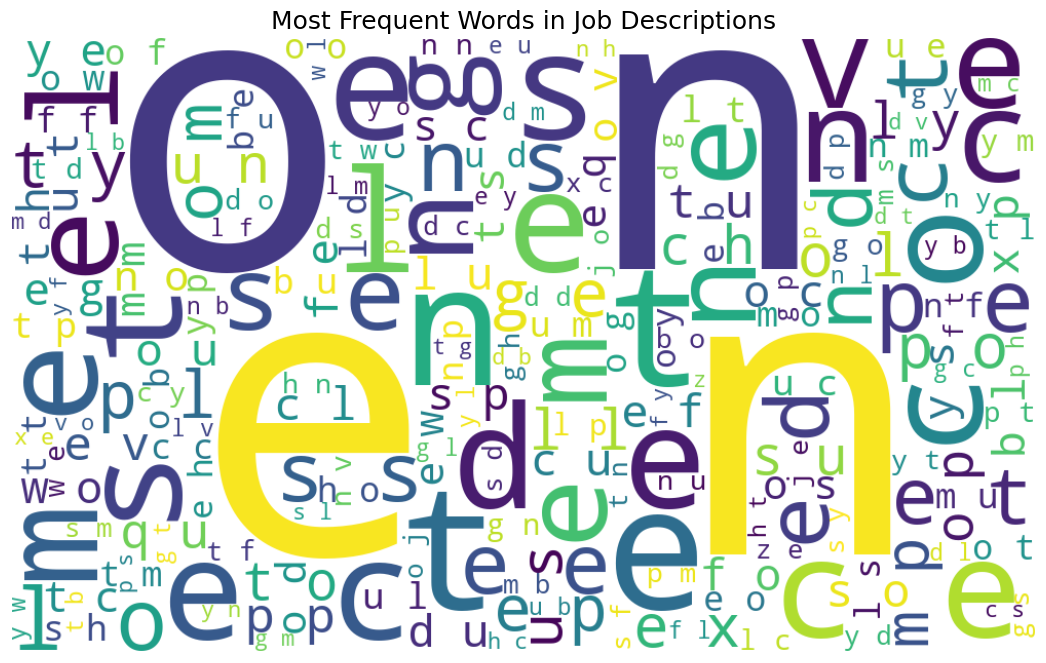

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = [word for tokens in df['lemmas_cleaned'] for word in tokens]

text = " ".join(all_words)

# Create word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Job Descriptions", fontsize=18)
plt.show()
